In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"Cheapestelectriccars-EVDatabase.csv")
df

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats
0,Opel Ampera-e,Battery Electric Vehicle | 58 kWh,7.3 sec,150 km/h,335 km,173 Wh/km,210 km/h,Front Wheel Drive,5
1,Renault Kangoo Maxi ZE 33,Battery Electric Vehicle | 31 kWh,22.4 sec,130 km/h,160 km,194 Wh/km,-,Front Wheel Drive,5
2,Nissan Leaf,Battery Electric Vehicle | 36 kWh,7.9 sec,144 km/h,220 km,164 Wh/km,230 km/h,Front Wheel Drive,5
3,Audi e-tron Sportback 55 quattro,Battery Electric Vehicle | 86.5 kWh,5.7 sec,200 km/h,375 km,231 Wh/km,600 km/h,All Wheel Drive,5
4,Porsche Taycan Turbo S,Battery Electric Vehicle | 83.7 kWh,2.8 sec,260 km/h,390 km,215 Wh/km,860 km/h,All Wheel Drive,4
...,...,...,...,...,...,...,...,...,...
175,MG Marvel R,Battery Electric Vehicle | 65 kWh,7.9 sec,200 km/h,340 km,191 Wh/km,390 km/h,Rear Wheel Drive,5
176,Tesla Model 3 Long Range Dual Motor,Battery Electric Vehicle | 76 kWh,4.4 sec,233 km/h,490 km,155 Wh/km,820 km/h,All Wheel Drive,5
177,MG MG5 EV Long Range,Battery Electric Vehicle | 57 kWh,7.7 sec,185 km/h,340 km,168 Wh/km,340 km/h,Front Wheel Drive,5
178,Audi Q4 e-tron 45 quattro,Battery Electric Vehicle | 76.6 kWh,6.9 sec,180 km/h,385 km,199 Wh/km,470 km/h,All Wheel Drive,5


In [4]:
# Here we are splitting Subtitle column into two separate columns
df[['VehicleType', 'BatteryCapacity']] = df['Subtitle'].str.split('|', expand=True)

In [5]:
df['VehicleType'] = df['VehicleType'].str.strip()
df['BatteryCapacity'] = df['BatteryCapacity'].str.strip()

In [6]:
df = df.drop(columns=['Subtitle'])

In [7]:
df.columns.unique()

Index(['Name', 'Acceleration', 'TopSpeed', 'Range', 'Efficiency',
       'FastChargeSpeed', 'Drive', 'NumberofSeats', 'VehicleType',
       'BatteryCapacity'],
      dtype='object')

In [8]:
df.size

1800

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             180 non-null    object
 1   Acceleration     180 non-null    object
 2   TopSpeed         180 non-null    object
 3   Range            180 non-null    object
 4   Efficiency       180 non-null    object
 5   FastChargeSpeed  180 non-null    object
 6   Drive            180 non-null    object
 7   NumberofSeats    180 non-null    int64 
 8   VehicleType      180 non-null    object
 9   BatteryCapacity  180 non-null    object
dtypes: int64(1), object(9)
memory usage: 14.2+ KB


In [10]:
df.isnull().sum()

Name               0
Acceleration       0
TopSpeed           0
Range              0
Efficiency         0
FastChargeSpeed    0
Drive              0
NumberofSeats      0
VehicleType        0
BatteryCapacity    0
dtype: int64

In [11]:
df

,Name,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,VehicleType,BatteryCapacity
0,Opel Ampera-e,7.3 sec,150 km/h,335 km,173 Wh/km,210 km/h,Front Wheel Drive,5,Battery Electric Vehicle,58 kWh
1,Renault Kangoo Maxi ZE 33,22.4 sec,130 km/h,160 km,194 Wh/km,-,Front Wheel Drive,5,Battery Electric Vehicle,31 kWh
2,Nissan Leaf,7.9 sec,144 km/h,220 km,164 Wh/km,230 km/h,Front Wheel Drive,5,Battery Electric Vehicle,36 kWh
3,Audi e-tron Sportback 55 quattro,5.7 sec,200 km/h,375 km,231 Wh/km,600 km/h,All Wheel Drive,5,Battery Electric Vehicle,86.5 kWh
4,Porsche Taycan Turbo S,2.8 sec,260 km/h,390 km,215 Wh/km,860 km/h,All Wheel Drive,4,Battery Electric Vehicle,83.7 kWh
...,...,...,...,...,...,...,...,...,...,...
175,MG Marvel R,7.9 sec,200 km/h,340 km,191 Wh/km,390 km/h,Rear Wheel Drive,5,Battery Electric Vehicle,65 kWh
176,Tesla Model 3 Long Range Dual Motor,4.4 sec,233 km/h,490 km,155 Wh/km,820 km/h,All Wheel Drive,5,Battery Electric Vehicle,76 kWh
177,MG MG5 EV Long Range,7.7 sec,185 km/h,340 km,168 Wh/km,340 km/h,Front Wheel Drive,5,Battery Electric Vehicle,57 kWh
178,Audi Q4 e-tron 45 quattro,6.9 sec,180 km/h,385 km,199 Wh/km,470 km/h,All Wheel Drive,5,Battery Electric Vehicle,76.6 kWh


In [12]:
df['VehicleType'].unique()

array(['Battery Electric Vehicle'], dtype=object)

In [13]:
df['Drive'].unique()

array(['Front Wheel Drive', 'All Wheel Drive', 'Rear Wheel Drive'],
      dtype=object)

In [14]:
# Here we are stripping the units and just keepinf numeric values convertig them into float
df['TopSpeed'] = df['TopSpeed'].str.replace(' km/h', '').astype(float)
df['FastChargeSpeed'] = df['FastChargeSpeed'].replace('-', '0').str.replace(' km/h', '').astype(float)

In [15]:
df['Range'] = df['Range'].str.extract('(\d+)', expand=False).astype(int)

In [16]:
df['Efficiency'] = df['Efficiency'].str.extract('(\d+)', expand=False).astype(float)

In [17]:
df['Acceleration'] = df['Acceleration'].str.extract('(\d+\.\d+)', expand=False).astype(float)
df['BatteryCapacity'] = df['BatteryCapacity'].str.extract('(\d+)', expand=False).astype(int)

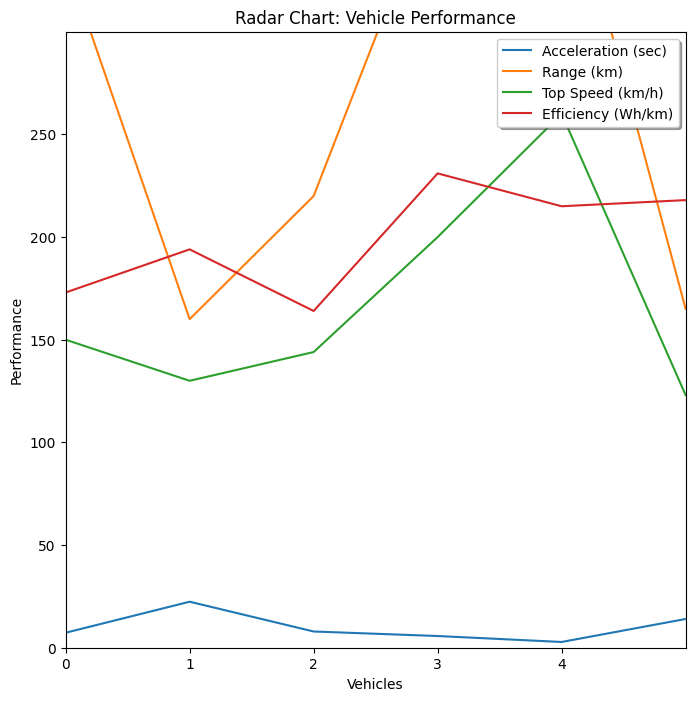

In [18]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(df['Acceleration'], label='Acceleration (sec)')
ax.plot(df['Range'], label='Range (km)')
ax.plot(df['TopSpeed'], label='Top Speed (km/h)')
ax.plot(df['Efficiency'], label='Efficiency (Wh/km)')

# Set the axis labels and title
ax.set_xlabel('Vehicles')
ax.set_ylabel('Performance')
ax.set_title('Radar Chart: Vehicle Performance')

# Set the axis limits and ticks
ax.set_xlim([0, 5])
ax.set_ylim([0, 300])
ax.set_xticks(np.arange(5))
ax.set_yticks(np.arange(0, 300, 50))


# Add a legend and show the plot
legend = ax.legend(loc='upper right', shadow=True)
plt.show()

Variance of accleration is so huge

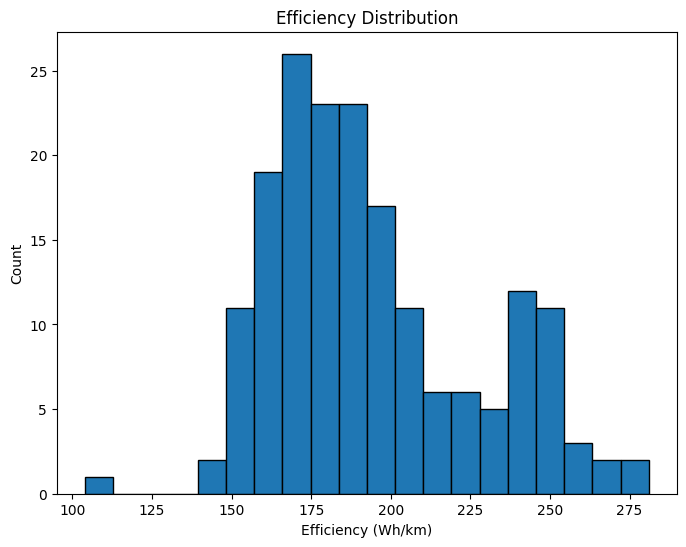

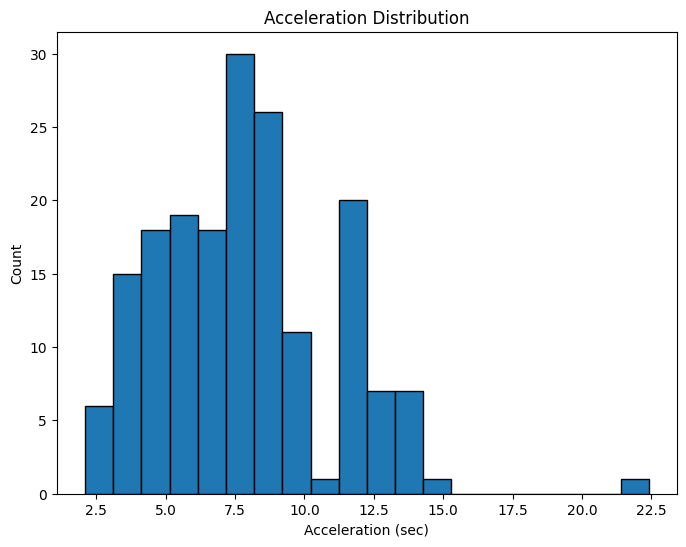

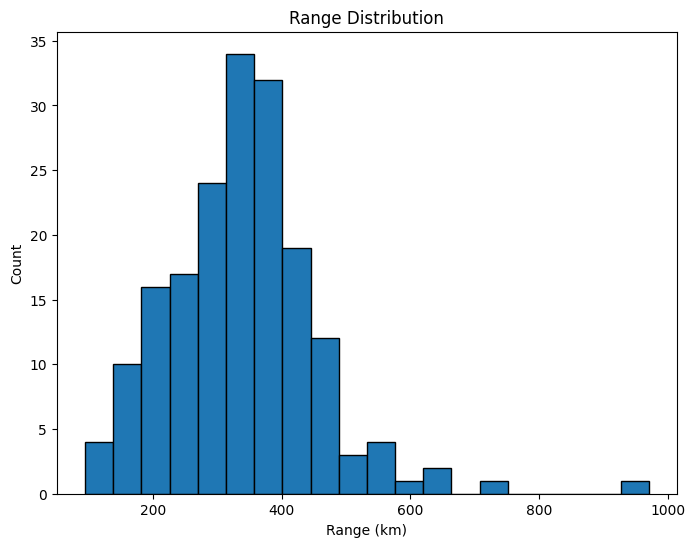

In [19]:
# Here we are plotting histogram for different parameters
# Histogram for efficiency
plt.figure(figsize=(8, 6))
plt.hist(df['Efficiency'], bins=20, edgecolor='black')
plt.title('Efficiency Distribution')
plt.xlabel('Efficiency (Wh/km)')
plt.ylabel('Count')
plt.show()

# Histogram for acceleration
plt.figure(figsize=(8, 6))
plt.hist(df['Acceleration'], bins=20, edgecolor='black')
plt.title('Acceleration Distribution')
plt.xlabel('Acceleration (sec)')
plt.ylabel('Count')
plt.show()

# Histogram for range
plt.figure(figsize=(8, 6))
plt.hist(df['Range'], bins=20, edgecolor='black')
plt.title('Range Distribution')
plt.xlabel('Range (km)')
plt.ylabel('Count')
plt.show()

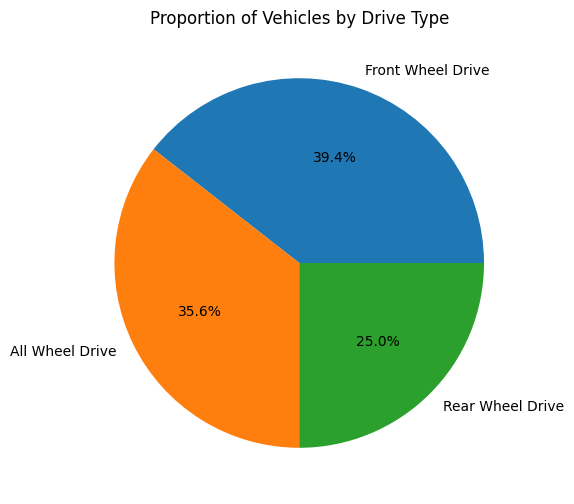

In [20]:
# Pie is the best visualization to categorize between Vehicles by  drive types
drive_types = df['Drive'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(drive_types, labels=drive_types.index, autopct='%1.1f%%')
plt.title('Proportion of Vehicles by Drive Type')
plt.show()

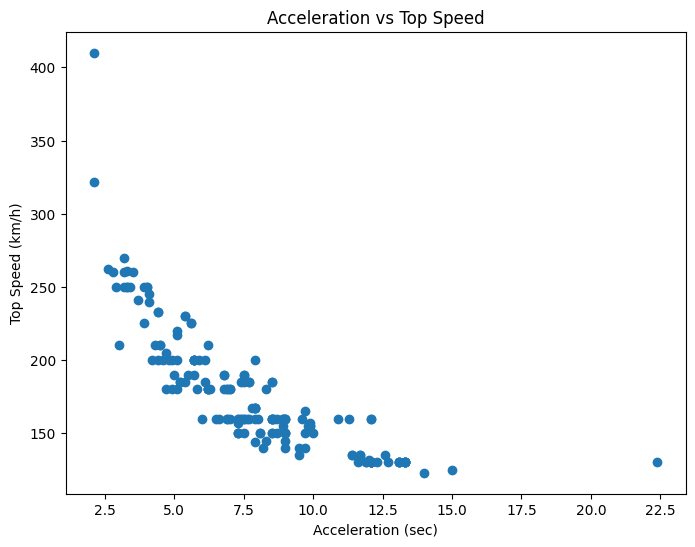

In [21]:
# Scatter plot for acceleration vs top speed
plt.figure(figsize=(8, 6))
plt.scatter(df['Acceleration'], df['TopSpeed'])
plt.xlabel('Acceleration (sec)')
plt.ylabel('Top Speed (km/h)')
plt.title('Acceleration vs Top Speed')
plt.show()

In [44]:
# This tells a negative correlation, indicating that vehicles with higher top speeds tend to have lower acceleration times.

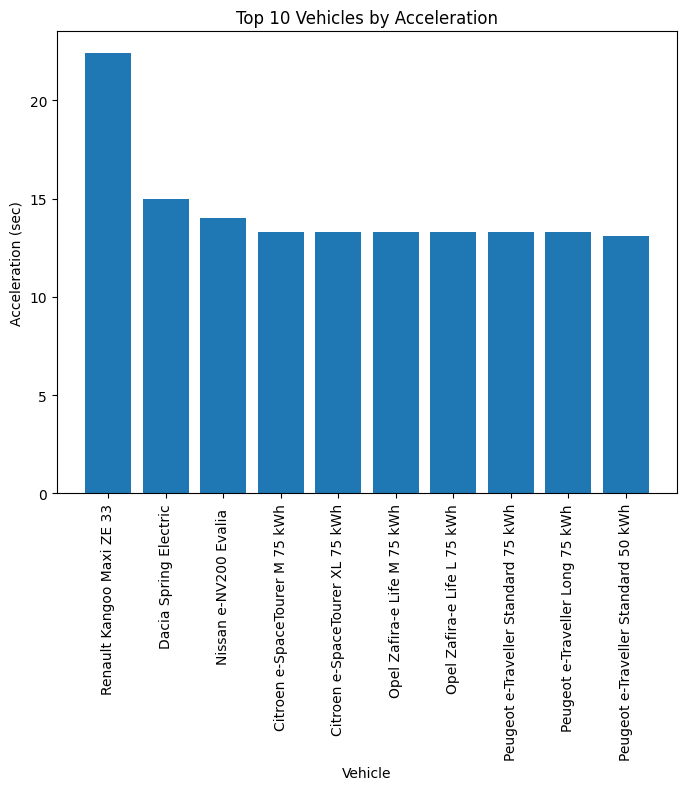

In [22]:
# Top 10 vehicles with highest acceleration
top_acceleration = df.nlargest(10, 'Acceleration')
plt.figure(figsize=(8, 6))
plt.bar(top_acceleration['Name'], top_acceleration['Acceleration'])
plt.xlabel('Vehicle')
plt.ylabel('Acceleration (sec)')
plt.title('Top 10 Vehicles by Acceleration')
plt.xticks(rotation=90)
plt.show()


Renault is the one of the best EV cars acceleration wise

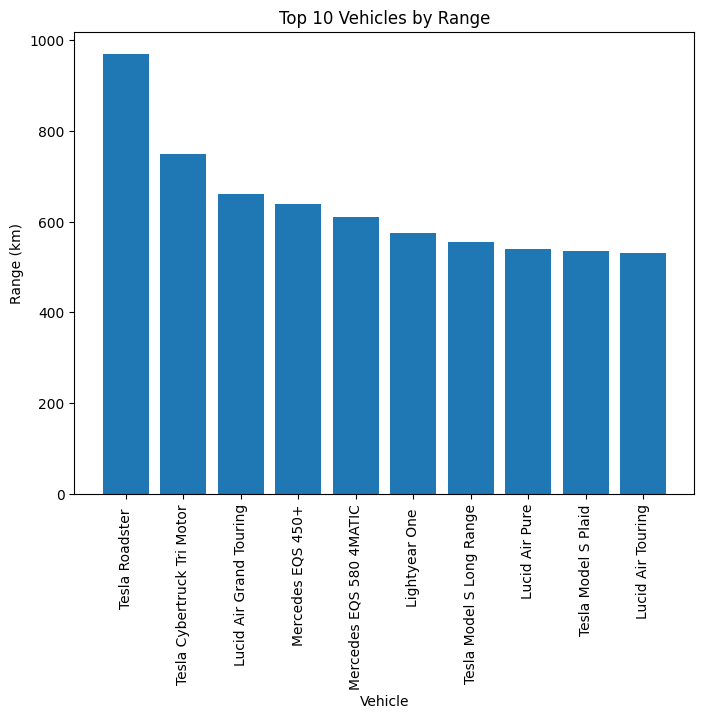

In [23]:
# Top 10 vehicles with highest range
top_range = df.nlargest(10, 'Range')
plt.figure(figsize=(8, 6))
plt.bar(top_range['Name'], top_range['Range'])
plt.xlabel('Vehicle')
plt.ylabel('Range (km)')
plt.title('Top 10 Vehicles by Range')
plt.xticks(rotation=90)
plt.show()

Tesla EV Cars are most Range cars

In [24]:
# Here we have just taken numerical data to perform PCA
X = df[['Acceleration', 'TopSpeed', 'Range', 'Efficiency', 'FastChargeSpeed', 'BatteryCapacity']]

In [25]:
X.describe()

,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,BatteryCapacity
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,7.854444,176.400000,337.388889,194.272222,467.888889,65.072222
std,3.169465,42.096006,118.718078,32.684001,252.128346,24.969038
min,2.100000,123.000000,95.000000,104.000000,0.000000,16.000000
25%,5.575000,150.000000,258.750000,168.000000,280.000000,45.000000
50%,7.500000,160.000000,340.000000,188.500000,420.000000,66.000000
75%,9.625000,200.000000,400.000000,215.250000,590.000000,77.000000
max,22.400000,410.000000,970.000000,281.000000,1410.000000,200.000000


PCA is used to reduce the dimensionality of the data, making it easier to visualize and understand

In [26]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
from sklearn.decomposition import PCA

pca = PCA(random_state = 42)
pca.fit(X_scaled)

PCA(random_state=42)

In [28]:
X_pca = pca.fit_transform(X_scaled)

In [29]:
df_pca = pd.DataFrame(data=X_pca, columns=[f'PC{x +1}' for x in range(len(X.columns))])

In [30]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-0.799383,-0.574895,0.402211,-0.814321,-0.429332,-0.081507
1,-4.632914,0.636634,1.454549,0.868639,2.283098,0.172070
2,-1.748787,-1.109325,-0.309376,-0.432835,-0.353878,0.055319
3,1.304267,1.097702,-0.450395,-0.050305,-0.146587,0.031765
4,2.819378,0.214568,-1.400356,0.152108,0.307955,0.044242


In [31]:
pca_summary = pd.DataFrame({'Standard Deviation':df_pca.std(),
                           'Proportion of Variance': pca.explained_variance_ratio_,
                           'Cumultive Proportion': pca.explained_variance_ratio_.cumsum()})

In [32]:
pca_summary

,Standard Deviation,Proportion of Variance,Cumultive Proportion
PC1,1.999636,0.662721,0.662721
PC2,1.095269,0.198825,0.861546
PC3,0.624288,0.064595,0.926141
PC4,0.512973,0.043613,0.969755
PC5,0.413307,0.028312,0.998067
PC6,0.107999,0.001933,1.000000


In [33]:
clusters = pd.DataFrame(pca.components_, columns = X.columns, index = df_pca.columns).T

In [34]:
clusters.style.background_gradient(cmap='Oranges')

,PC1,PC2,PC3,PC4,PC5,PC6
Acceleration,-0.437619,0.191483,0.471645,0.414364,0.611712,0.059033
TopSpeed,0.455214,-0.086170,-0.370172,-0.206839,0.778168,-0.000133
Range,0.465046,-0.007356,0.587631,-0.064743,-0.010645,-0.658834
Efficiency,0.003953,0.896053,-0.320949,0.057696,-0.040478,-0.298493
FastChargeSpeed,0.443176,-0.094530,-0.165581,0.863821,-0.118864,0.083225
BatteryCapacity,0.434259,0.379484,0.405941,-0.178361,-0.066199,0.682955


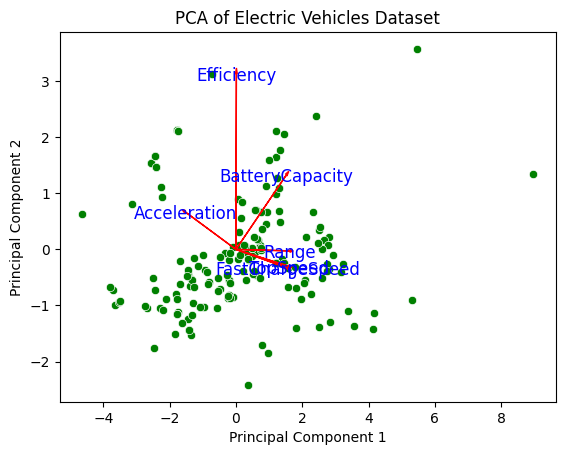

In [35]:
# Perform PCA
pca = PCA(n_components=2)

# Visualize the PCA components
sns.scatterplot(data=df_pca, x='PC1', y='PC2', color='Green')
index_names = clusters.index
for i in range(len(clusters['PC1'])):
    plt.arrow(0, 0, clusters['PC1'][i] * 3.5, clusters['PC2'][i] * 3.5,
              head_width=0.05, head_length=0.1, fc='red', ec='red')
    plt.text(clusters['PC1'][i] * 3.5, clusters['PC2'][i] * 3.5,
             index_names[i], fontsize=12, ha='center', color='blue', va='center_baseline')


plt.title('PCA of Electric Vehicles Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

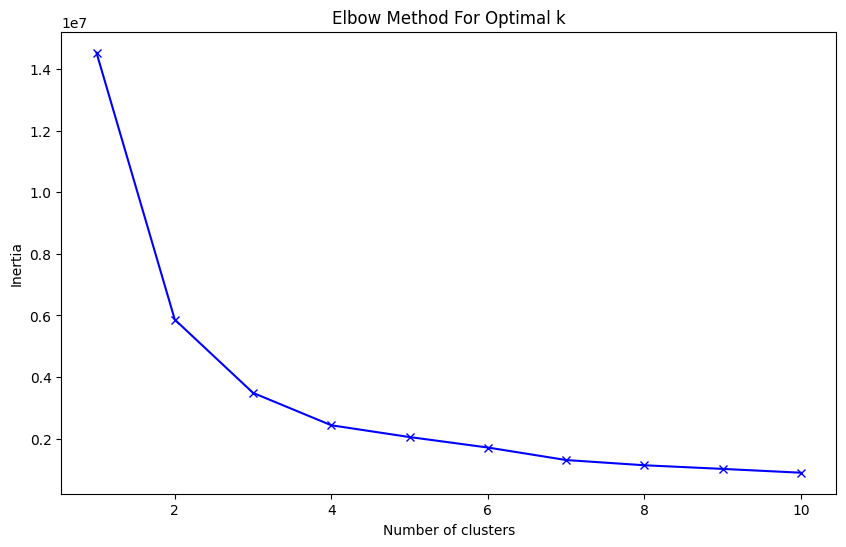

In [36]:
from sklearn.cluster import KMeans
import numpy as np

# Features for clustering
X = df[['Acceleration', 'TopSpeed', 'Range', 'Efficiency', 'FastChargeSpeed', 'BatteryCapacity']]

# Elbow method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


In [37]:
data_pca = df_pca.copy()

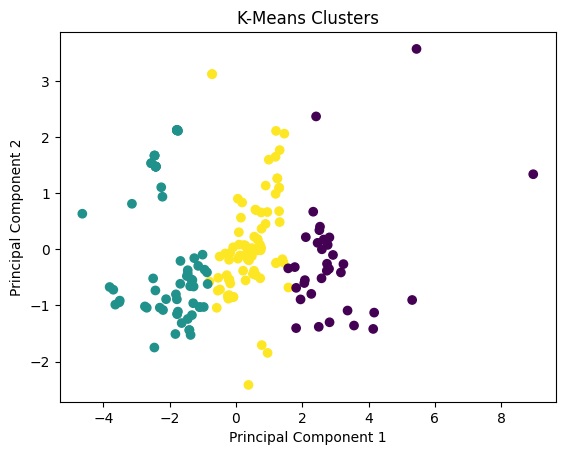

In [38]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Initialize KMeans with the optimal K
kmeans = KMeans(n_clusters=3)

# Fit the model to the preprocessed data (X_pca)
kmeans.fit(X_pca)

# Predict cluster labels
labels = kmeans.predict(X_pca)

# Plot the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clusters')
plt.show()

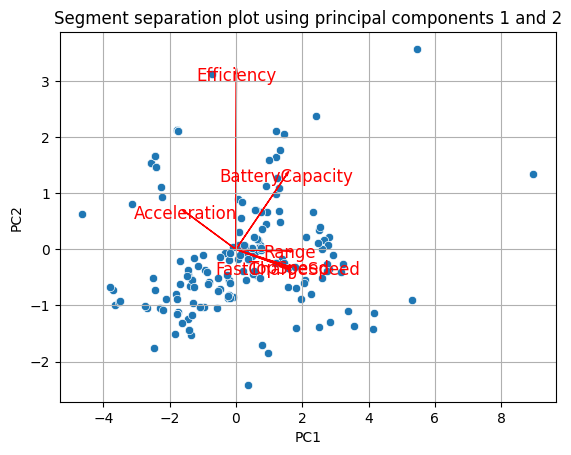

In [39]:
index_names = clusters.index

sns.scatterplot(data_pca, x = 'PC1', y = 'PC2', palette = 'tab10')

for i in range(len(clusters['PC1'])):
    plt.arrow(0, 0, clusters['PC1'][i] * 3.5, clusters['PC2'][i] * 3.5, head_width=0.05, head_length=0.1, fc='red', ec='red')
    plt.text(clusters['PC1'][i] * 3.5, clusters['PC2'][i]* 3.5, index_names[i], fontsize=12, ha='center', color = 'red', va = 'center_baseline')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Segment separation plot using principal components 1 and 2')
plt.grid(True)
plt.show()


Mosaic plots are used to visualize the relationship between categorical variables

<Figure size 1000x600 with 0 Axes>

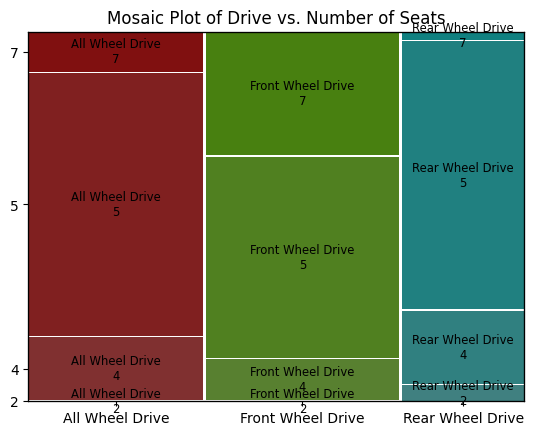

In [40]:
contingency_table = pd.crosstab(df['Drive'], df['NumberofSeats'])

# Plot the mosaic plot
plt.figure(figsize=(10, 6))
mosaic(contingency_table.stack(), title='Mosaic Plot of Drive vs. Number of Seats')
plt.show()

Majority states that All wheel Drive cars with 5 number of seats

<Figure size 1400x1000 with 0 Axes>

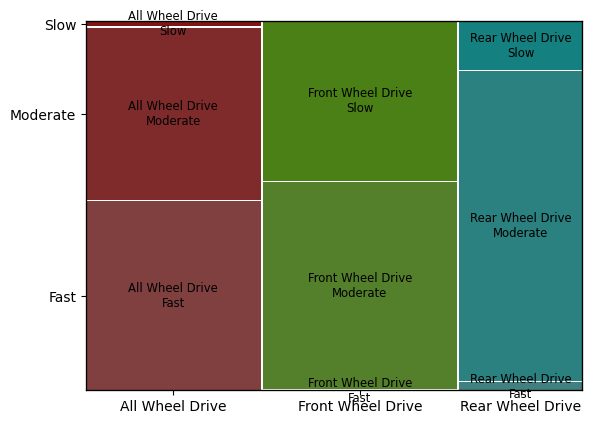

In [41]:
# Function to categorize acceleration
def categorize_acceleration(acc):
    if acc < 5:
        return 'Fast'
    elif acc < 10:
        return 'Moderate'
    else:
        return 'Slow'

# Apply the function to create a new column
df['AccelerationGroup'] = df['Acceleration'].apply(categorize_acceleration)

# Create a contingency table for Drive vs. Acceleration Group
contingency_table_acceleration = pd.crosstab(df['Drive'], df['AccelerationGroup'])

plt.figure(figsize=(14, 10))
mosaic(contingency_table_acceleration.stack())
plt.show()


Acceleration of cars tend towards more fast than moderate

### Conclusion:
Vehicles exhibit a broad range of acceleration times, indicating significant variability in performance. Majority of the vehicles have a range between 200-400 km, suggesting a common target for manufacturers.


Most vehicles have top speeds clustered around 150-200 km/h.
Efficiency values vary, but the majority of vehicles lie between 150-200 Wh/km, indicating a focus on energy efficiency



Overall, our analysis provides a robust foundation for strategic decision-making in product development, marketing, and market positioning. By leveraging these insights, we can ensure our electric vehicles resonate effectively with the target market, driving higher market penetration and customer satisfaction.
